In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv


In [2]:
train_data = pd.read_csv('../input/competitive-data-science-predict-future-sales/sales_train.csv')
train_data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [4]:
train_data.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [5]:
items = pd.read_csv('../input/competitive-data-science-predict-future-sales/items.csv')
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [6]:
item_cats = pd.read_csv('../input/competitive-data-science-predict-future-sales/item_categories.csv')
item_cats.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [7]:
shops = pd.read_csv('../input/competitive-data-science-predict-future-sales/shops.csv')
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [8]:
test_data = pd.read_csv('../input/competitive-data-science-predict-future-sales/test.csv')
test_data.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [9]:
train_data['date'] =  pd.to_datetime(train_data['date'],format = '%d.%m.%Y')
train_data['date']

0         2013-01-02
1         2013-01-03
2         2013-01-05
3         2013-01-06
4         2013-01-15
             ...    
2935844   2015-10-10
2935845   2015-10-09
2935846   2015-10-14
2935847   2015-10-22
2935848   2015-10-03
Name: date, Length: 2935849, dtype: datetime64[ns]

In [10]:
train_data = train_data.join(items.set_index('item_id'), on = 'item_id')
train_data = train_data.join(item_cats.set_index('item_category_id'), on = 'item_category_id')
train_data = train_data.join(shops.set_index('shop_id'), on = 'shop_id')

<AxesSubplot:xlabel='item_price', ylabel='item_cnt_day'>

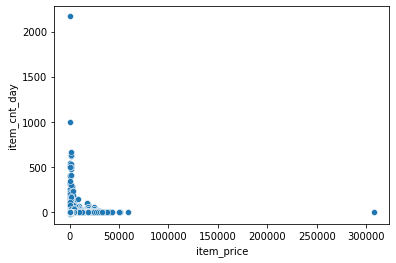

In [11]:
import seaborn as sns
sns.scatterplot(data = train_data, x = 'item_price', y = 'item_cnt_day')

**There are outliers here!**

In [12]:
train_data.loc[train_data.item_price > 300000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
1163158,2013-12-13,11,12,6066,307980.0,1.0,Radmin 3 - 522 лиц.,75,Программы - Для дома и офиса,Интернет-магазин ЧС


In [13]:
train_data.loc[train_data.item_cnt_day > 900]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
2326930,2015-01-15,24,12,20949,4.000000,1000.0,Фирменный пакет майка 1С Интерес белый (34*42)...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши",Интернет-магазин ЧС
2909818,2015-10-28,33,12,11373,0.908714,2169.0,Доставка до пункта выдачи (Boxberry),9,Доставка товара,Интернет-магазин ЧС


In [14]:
train_data = train_data.drop(labels = [2326930, 2909818, 1163158], axis = 0)

<AxesSubplot:xlabel='date_block_num', ylabel='item_cnt_day'>

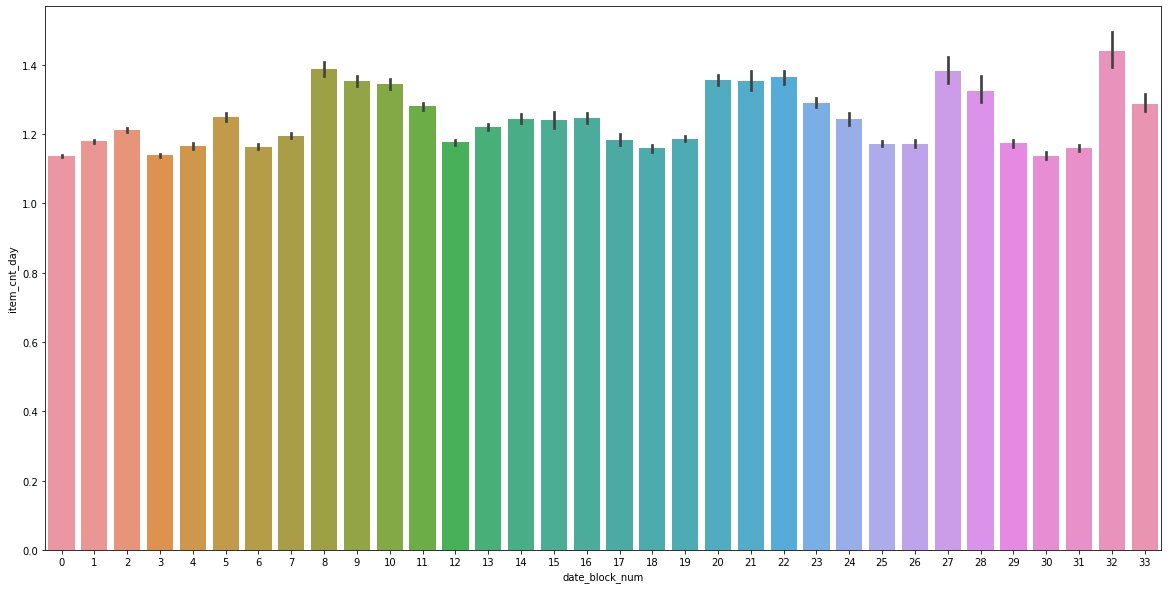

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
sns.barplot(data = train_data, x = 'date_block_num', y = 'item_cnt_day')

In [16]:
train_data.item_name.value_counts()

Фирменный пакет майка 1С Интерес белый (34*42) 45 мкм                                                   31339
Playstation Store пополнение бумажника: Карта оплаты 1000 руб.                                           9408
Прием денежных средств для 1С-Онлайн                                                                     9067
Diablo III [PC, Jewel, русская версия]                                                                   7479
Kaspersky Internet Security Multi-Device Russian Edition. 2-Device 1 year Renewal Box                    6853
                                                                                                        ...  
1С:Образовательная коллекция. Изучаем единицы измерения! Интерактивный тренажёр [PC, Цифровая версия        1
Смешарики. Калейдоскоп игр 3. Романтика [PC, Цифровая версия]                                               1
Сдаем ЕГЭ по обществознанию 2013 [PC, Цифровая версия]                                                      1
The Sims M

In [17]:
train_data.item_category_name.value_counts()

Кино - DVD                             564652
Игры PC - Стандартные издания          351591
Музыка - CD локального производства    339585
Игры - PS3                             208219
Кино - Blu-Ray                         192674
                                        ...  
Книги - Путеводители                        3
Аксессуары - PS2                            2
Книги - Открытки                            2
Книги - Познавательная литература           1
Игровые консоли - PS2                       1
Name: item_category_name, Length: 84, dtype: int64

In [18]:
train_data.shop_name.value_counts()

Москва ТЦ "Семеновский"                            235636
Москва ТРК "Атриум"                                186104
Химки ТЦ "Мега"                                    143480
Москва ТЦ "МЕГА Теплый Стан" II                    142234
Якутск Орджоникидзе, 56                            117428
СПб ТК "Невский Центр"                             109253
Москва ТЦ "МЕГА Белая Дача II"                     105366
Воронеж (Плехановская, 13)                          82663
Якутск ТЦ "Центральный"                             71441
Чехов ТРЦ "Карнавал"                                69573
Сергиев Посад ТЦ "7Я"                               66321
Тюмень ТЦ "Гудвин"                                  65173
Курск ТЦ "Пушкинский"                               63911
Калуга ТРЦ "XXI век"                                59511
Н.Новгород ТРЦ "Фантастика"                         58445
Москва МТРЦ "Афи Молл"                              58133
Воронеж ТРЦ "Максимир"                              58076
Сургут ТРЦ "Си

In [19]:
from sklearn.preprocessing import LabelEncoder

lbl_encoder = LabelEncoder()
train_data['item_category_name'] = lbl_encoder.fit_transform(train_data['item_category_name'])
train_data['shop_name'] = lbl_encoder.fit_transform(train_data['shop_name'])

train_data = train_data.drop(['date', 'item_name'], axis = 1)
train_data


,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,item_category_name,shop_name
0,0,59,22154,999.00,1.0,37,37,59
1,0,25,2552,899.00,1.0,58,58,25
2,0,25,2552,899.00,-1.0,58,58,25
3,0,25,2554,1709.05,1.0,58,58,25
4,0,25,2555,1099.00,1.0,56,56,25
...,...,...,...,...,...,...,...,...
2935844,33,25,7409,299.00,1.0,55,55,25
2935845,33,25,7460,299.00,1.0,55,55,25
2935846,33,25,7459,349.00,1.0,55,55,25
2935847,33,25,7440,299.00,1.0,57,57,25


In [20]:
monthly_train_data = train_data.groupby(by = ['date_block_num', 'shop_id', 'item_id'], as_index=False).item_cnt_day.sum()
monthly_train_data.tail()

,date_block_num,shop_id,item_id,item_cnt_day
1609117,33,59,22087,6.0
1609118,33,59,22088,2.0
1609119,33,59,22091,1.0
1609120,33,59,22100,1.0
1609121,33,59,22102,1.0


In [21]:
monthly_train_data = monthly_train_data.rename(columns={"item_cnt_day": "item_cnt_month"})

In [22]:
monthly_train_data = monthly_train_data.join(items.set_index('item_id'), on = 'item_id')
monthly_train_data = monthly_train_data.join(item_cats.set_index('item_category_id'), on ='item_category_id')
monthly_train_data = monthly_train_data.join(shops.set_index('shop_id'), on = 'shop_id')
monthly_train_data.head()
                                             

,date_block_num,shop_id,item_id,item_cnt_month,item_name,item_category_id,item_category_name,shop_name
0,0,0,32,6.0,1+1,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
1,0,0,33,3.0,1+1 (BD),37,Кино - Blu-Ray,"!Якутск Орджоникидзе, 56 фран"
2,0,0,35,1.0,10 ЛЕТ СПУСТЯ,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
3,0,0,43,1.0,100 МИЛЛИОНОВ ЕВРО,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
4,0,0,51,2.0,100 лучших произведений классики (mp3-CD) (Dig...,57,Музыка - MP3,"!Якутск Орджоникидзе, 56 фран"


In [23]:
"""
from sklearn.feature_selection import mutual_info_regression
y = monthly_train_data['item_cnt_month']
X = monthly_train_data.drop('item_cnt_month', axis = 1)
disc_feat = X.dtypes == int
mi_scores = mutual_info_regression(X, y, discrete_features=disc_feat, random_state = 10)
mi_scores = pd.Series(mi_scores, name = 'MI scores', index = X.columns)
mi_scores = mi_scores.sort_values(ascending = False)
mi_scores
"""

"\nfrom sklearn.feature_selection import mutual_info_regression\ny = monthly_train_data['item_cnt_month']\nX = monthly_train_data.drop('item_cnt_month', axis = 1)\ndisc_feat = X.dtypes == int\nmi_scores = mutual_info_regression(X, y, discrete_features=disc_feat, random_state = 10)\nmi_scores = pd.Series(mi_scores, name = 'MI scores', index = X.columns)\nmi_scores = mi_scores.sort_values(ascending = False)\nmi_scores\n"

In [24]:
test_data.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [25]:
test_data['date_block_num'] = 34
test_data.head()

,ID,shop_id,item_id,date_block_num
0,0,5,5037,34
1,1,5,5320,34
2,2,5,5233,34
3,3,5,5232,34
4,4,5,5268,34


In [26]:
test_data = test_data.join(items.set_index('item_id'), on = 'item_id')
test_data = test_data.join(item_cats.set_index('item_category_id'), on ='item_category_id')
test_data = test_data.join(shops.set_index('shop_id'), on = 'shop_id')
test_data = test_data.drop('item_name', axis = 1)
test_data.head()

,ID,shop_id,item_id,date_block_num,item_category_id,item_category_name,shop_name
0,0,5,5037,34,19,Игры - PS3,"Вологда ТРЦ ""Мармелад"""
1,1,5,5320,34,55,Музыка - CD локального производства,"Вологда ТРЦ ""Мармелад"""
2,2,5,5233,34,19,Игры - PS3,"Вологда ТРЦ ""Мармелад"""
3,3,5,5232,34,23,Игры - XBOX 360,"Вологда ТРЦ ""Мармелад"""
4,4,5,5268,34,20,Игры - PS4,"Вологда ТРЦ ""Мармелад"""


In [27]:
df_large = pd.concat([monthly_train_data, test_data])

In [28]:
lbl_encoder = LabelEncoder()
df_large['item_category_name'] =lbl_encoder.fit_transform(df_large['item_category_name'])
df_large['shop_name'] = lbl_encoder.fit_transform(df_large['shop_name'])
df_large = df_large.drop('item_name', axis =1)


In [29]:
df_large.tail()

,date_block_num,shop_id,item_id,item_cnt_month,item_category_id,item_category_name,shop_name,ID
214195,34,45,18454,NaN,55,55,45,214195.0
214196,34,45,16188,NaN,64,64,45,214196.0
214197,34,45,15757,NaN,55,55,45,214197.0
214198,34,45,19648,NaN,40,40,45,214198.0
214199,34,45,969,NaN,37,37,45,214199.0


In [30]:
monthly_train_data.tail()

,date_block_num,shop_id,item_id,item_cnt_month,item_name,item_category_id,item_category_name,shop_name
1609117,33,59,22087,6.0,Элемент питания DURACELL LR03-BC2,83,Элементы питания,"Ярославль ТЦ ""Альтаир"""
1609118,33,59,22088,2.0,Элемент питания DURACELL LR06-BC2,83,Элементы питания,"Ярославль ТЦ ""Альтаир"""
1609119,33,59,22091,1.0,Элемент питания DURACELL TURBO LR 03 2*BL,83,Элементы питания,"Ярославль ТЦ ""Альтаир"""
1609120,33,59,22100,1.0,Энциклопедия Adventure Time,42,"Книги - Артбуки, энциклопедии","Ярославль ТЦ ""Альтаир"""
1609121,33,59,22102,1.0,Энциклопедия Мир Ведьмака,42,"Книги - Артбуки, энциклопедии","Ярославль ТЦ ""Альтаир"""


In [31]:
train_data = df_large.loc[df_large.date_block_num < 34]
train_data = train_data.drop('ID', axis = 1)
train_data.tail()

,date_block_num,shop_id,item_id,item_cnt_month,item_category_id,item_category_name,shop_name
1609117,33,59,22087,6.0,83,83,59
1609118,33,59,22088,2.0,83,83,59
1609119,33,59,22091,1.0,83,83,59
1609120,33,59,22100,1.0,42,42,59
1609121,33,59,22102,1.0,42,42,59


In [32]:
test_data = df_large.loc[df_large.date_block_num == 34]
test_data = test_data.drop('item_cnt_month', axis = 1)
test_data.head()

,date_block_num,shop_id,item_id,item_category_id,item_category_name,shop_name,ID
0,34,5,5037,19,19,5,0.0
1,34,5,5320,55,55,5,1.0
2,34,5,5233,19,19,5,2.0
3,34,5,5232,23,23,5,3.0
4,34,5,5268,20,20,5,4.0


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error




y = train_data['item_cnt_month']
X = train_data.drop('item_cnt_month', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
rf=RandomForestRegressor()
"""
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(mean_absolute_error(y_test, y_pred))
"""
rf.fit(X,y)
ids = test_data.ID.values
test_data = test_data.drop('ID', axis = 1)
preds = rf.predict(test_data)


In [34]:
submission = pd.DataFrame({'ID':ids.astype('int'),'item_cnt_month':preds})
submission

,ID,item_cnt_month
0,0,1.70
1,1,2.14
2,2,1.20
3,3,1.03
4,4,1.12
...,...,...
214195,214195,1.01
214196,214196,1.00
214197,214197,1.05
214198,214198,1.01


In [35]:
submission.to_csv('submission.csv', index = False)